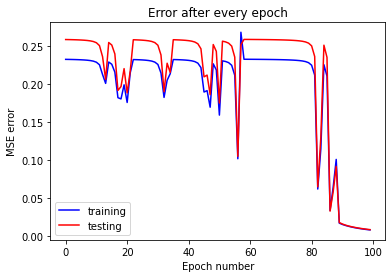

Hidden layer node one parameters: [-3.6044149   5.48975224  0.7582713 ]
Hidden layer node two parameters: [-0.78141239 -2.02565484  6.07536316]
Output layer parameters: [-7.15698418  5.15330517  4.58966642]
Observations: The model works well most of the times unlike in the case of XOR. This probably indicates that there are lesser sub-optimal points in AND function.


In [1]:
# The following code is a simple implementation of artificial neural networks for Logical AND operation. T = 1000
# Author: Dishank 

# Importing packages 
import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


"""
Data generation follows
"""

# Number of samples = T
T = 1000

# Generating data elements
data_elements = np.ones((T,3))
for i in range(T):
    data_elements[i,1] = np.random.choice([0,1])
    data_elements[i,2] = np.random.choice([0,1])

# Generating data labels (Note that logical AND operation is used)
data_labels = np.zeros(T)
for i in range(T):
    if data_elements[i,1] and data_elements[i,2]:
        data_labels[i] = 1

# Adding noise to data elements
for i in range(T):
    data_elements[i,1:] += np.random.multivariate_normal([0,0], 0.01*np.identity(2))

# Splitting data into training and testing data
# training samples = N, testing samples = M
N = int(0.8*T)
M = int(0.2*T)

training_elements = data_elements[0:N,:]
testing_elements = data_elements[N:T,:]
training_labels = data_labels[0:N]
testing_labels = data_labels[N:T]


"""
Defining some functions and initializing parameters follows
"""

# Defining sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Defining derivative of sigmoid function
def s_d(x):
    return np.exp(-x)/(1+np.exp(-x))**2

# Initialize model parameters randomly, Alpha1[1:3] = Theta[0:2], Alpha2[1:3] = Theta[3:5], Beta[1:3] = Theta[6:8]
theta = np.array(np.random.uniform(-4,4, size = 9))

# Minibatch size = m
m = 400

# initialize lists to save training and testing errors
training_error_epoch = []
testing_error_epoch = []

# Define function to save mean square error over training data after every epoch
def training_error_save():
    training_error = (np.linalg.norm(training_labels - predictor(training_elements[:,1], training_elements[:,2])))**2
    training_error_epoch.append(training_error/N)

# Define function to save mean square error over testing data after every epoch
def testing_error_save():
    testing_error = (np.linalg.norm(testing_labels - predictor(testing_elements[:,1], testing_elements[:,2])))**2
    testing_error_epoch.append(testing_error/M)

# Define function to predict the label    
def predictor(a,b):
    return sigmoid(np.matmul(theta[6:9], [1, sigmoid(np.matmul(theta[0:3],[1,a,b])), sigmoid(np.matmul(theta[3:6],[1,a,b]))]))

# Learning Rate = Gamma
Gamma = 0.05


"""
Training the model and saving errors follows
"""

# Train the model(execute the code) for 100 epochs
for i in range(100):
    
    # Number of minibatches = N/m. Thus, for every minibatch, update parameters 
    for j in range(int(N/m)):
        
        # Initialize partial derivatives
        Partial_derivatives = np.zeros(9)
    
        # For every training point in minibatch, compute gradient
        for k in range(m):
            
            # Calculate Alpha1*[1,x1,x2] and Alpha2*[1,x1,x2]
            temp1 = np.matmul(theta[0:3],training_elements[m*j+k,:])
            temp2 = np.matmul(theta[3:6],training_elements[m*j+k,:])

            # Calculate Hidden layer node values
            Z = np.array([1,sigmoid(temp1),sigmoid(temp2)])
            
            # Calculate Beta*Z
            temp3 = np.matmul(theta[6:9], Z)
            
            # Calculate predicted label
            y_predicted = sigmoid(temp3)
            
            # Calculate partial derivatives
            Partial_derivatives[0:3] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[7]*s_d(temp1)*training_elements[m*j+k,:]
            Partial_derivatives[3:6] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[8]*s_d(temp2)*training_elements[m*j+k,:]
            Partial_derivatives[6:9] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*Z
        
        # Update parameters
        theta -= Gamma*Partial_derivatives
            
    # Saving training error at end of each epoch    
    training_error_save()
    testing_error_save()        

    
"""
Reporting results follows
"""

# Visualizing model 
plt.plot(training_error_epoch, 'b-', label = 'training')
plt.plot(testing_error_epoch, 'r-', label = 'testing')
plt.legend()
plt.xlabel("Epoch number")
plt.ylabel("MSE error")
plt.title("Error after every epoch")
plt.show()

# Printing model parameters
print("Hidden layer node one parameters:", theta[0:3])
print("Hidden layer node two parameters:", theta[3:6])
print("Output layer parameters:", theta[6:9])

# Printing observations
print("Observations: The model works well most of the times unlike in the case of XOR. This probably indicates that there are lesser sub-optimal points in AND function.")

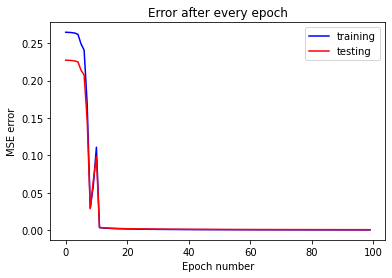

Hidden layer node one parameters: [-4.33597377  2.65772618  2.91905419]
Hidden layer node two parameters: [-8.67953901  5.60385073  5.76117168]
Output layer parameters: [-5.90938477  3.46706006  8.67850314]
Observations: The model works well most of the times unlike in the case of XOR. This probably indicates that there are lesser sub-optimal points in AND function.


In [2]:
# The following code is a simple implementation of artificial neural networks for Logical AND operation. T = 2500
# Author: Dishank 

# Importing packages 
import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


"""
Data generation follows
"""

# Number of samples = T
T = 2500

# Generating data elements
data_elements = np.ones((T,3))
for i in range(T):
    data_elements[i,1] = np.random.choice([0,1])
    data_elements[i,2] = np.random.choice([0,1])

# Generating data labels (Note that logical AND operation is used)
data_labels = np.zeros(T)
for i in range(T):
    if data_elements[i,1] and data_elements[i,2]:
        data_labels[i] = 1

# Adding noise to data elements
for i in range(T):
    data_elements[i,1:] += np.random.multivariate_normal([0,0], 0.01*np.identity(2))

# Splitting data into training and testing data
# training samples = N, testing samples = M
N = int(0.8*T)
M = int(0.2*T)

training_elements = data_elements[0:N,:]
testing_elements = data_elements[N:T,:]
training_labels = data_labels[0:N]
testing_labels = data_labels[N:T]


"""
Defining some functions and initializing parameters follows
"""

# Defining sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Defining derivative of sigmoid function
def s_d(x):
    return np.exp(-x)/(1+np.exp(-x))**2

# Initialize model parameters randomly, Alpha1[1:3] = Theta[0:2], Alpha2[1:3] = Theta[3:5], Beta[1:3] = Theta[6:8]
theta = np.array(np.random.uniform(-4,4, size = 9))

# Minibatch size = m
m = 400

# initialize lists to save training and testing errors
training_error_epoch = []
testing_error_epoch = []

# Define function to save mean square error over training data after every epoch
def training_error_save():
    training_error = (np.linalg.norm(training_labels - predictor(training_elements[:,1], training_elements[:,2])))**2
    training_error_epoch.append(training_error/N)

# Define function to save mean square error over testing data after every epoch
def testing_error_save():
    testing_error = (np.linalg.norm(testing_labels - predictor(testing_elements[:,1], testing_elements[:,2])))**2
    testing_error_epoch.append(testing_error/M)

# Define function to predict the label    
def predictor(a,b):
    return sigmoid(np.matmul(theta[6:9], [1, sigmoid(np.matmul(theta[0:3],[1,a,b])), sigmoid(np.matmul(theta[3:6],[1,a,b]))]))

# Learning Rate = Gamma
Gamma = 0.05

"""
Training the model and saving errors follows
"""

# Train the model(execute the code) for 100 epochs
for i in range(100):
    
    # Number of minibatches = N/m. Thus, for every minibatch, update parameters 
    for j in range(int(N/m)):
        
        # Initialize partial derivatives
        Partial_derivatives = np.zeros(9)
    
        # For every training point in minibatch, compute gradient
        for k in range(m):
            
            # Calculate Alpha1*[1,x1,x2] and Alpha2*[1,x1,x2]
            temp1 = np.matmul(theta[0:3],training_elements[m*j+k,:])
            temp2 = np.matmul(theta[3:6],training_elements[m*j+k,:])

            # Calculate Hidden layer node values
            Z = np.array([1,sigmoid(temp1),sigmoid(temp2)])
            
            # Calculate Beta*Z
            temp3 = np.matmul(theta[6:9], Z)
            
            # Calculate predicted label
            y_predicted = sigmoid(temp3)
            
            # Calculate partial derivatives
            Partial_derivatives[0:3] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[7]*s_d(temp1)*training_elements[m*j+k,:]
            Partial_derivatives[3:6] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[8]*s_d(temp2)*training_elements[m*j+k,:]
            Partial_derivatives[6:9] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*Z
        
        # Update parameters
        theta -= Gamma*Partial_derivatives
            
    # Saving training error at end of each epoch    
    training_error_save()
    testing_error_save()        

    
"""
Reporting results follows
"""

# Visualizing model 
plt.plot(training_error_epoch, 'b-', label = 'training')
plt.plot(testing_error_epoch, 'r-', label = 'testing')
plt.legend()
plt.xlabel("Epoch number")
plt.ylabel("MSE error")
plt.title("Error after every epoch")
plt.show()

# Printing model parameters
print("Hidden layer node one parameters:", theta[0:3])
print("Hidden layer node two parameters:", theta[3:6])
print("Output layer parameters:", theta[6:9])

# Printing observations
print("Observations: The model works well most of the times unlike in the case of XOR. This probably indicates that there are lesser sub-optimal points in AND function.")

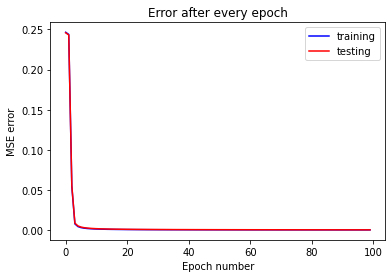

Hidden layer node one parameters: [ 5.32614722 -3.7544077  -3.4495736 ]
Hidden layer node two parameters: [-6.68887703  4.23918149  4.70600313]
Output layer parameters: [-1.54879897 -6.42681895  8.61645189]
Observations: The model works well most of the times unlike in the case of XOR. This probably indicates that there are lesser sub-optimal points in AND function.


In [3]:
# The following code is a simple implementation of artificial neural networks for Logical AND operation. T = 15000
# Author: Dishank 

# Importing packages 
import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


"""
Data generation follows
"""

# Number of samples = T
T = 5000

# Generating data elements
data_elements = np.ones((T,3))
for i in range(T):
    data_elements[i,1] = np.random.choice([0,1])
    data_elements[i,2] = np.random.choice([0,1])

# Generating data labels (Note that logical AND operation is used)
data_labels = np.zeros(T)
for i in range(T):
    if data_elements[i,1] and data_elements[i,2]:
        data_labels[i] = 1

# Adding noise to data elements
for i in range(T):
    data_elements[i,1:] += np.random.multivariate_normal([0,0], 0.01*np.identity(2))

# Splitting data into training and testing data
# training samples = N, testing samples = M
N = int(0.8*T)
M = int(0.2*T)

training_elements = data_elements[0:N,:]
testing_elements = data_elements[N:T,:]
training_labels = data_labels[0:N]
testing_labels = data_labels[N:T]


"""
Defining some functions and initializing parameters follows
"""

# Defining sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Defining derivative of sigmoid function
def s_d(x):
    return np.exp(-x)/(1+np.exp(-x))**2

# Initialize model parameters randomly, Alpha1[1:3] = Theta[0:2], Alpha2[1:3] = Theta[3:5], Beta[1:3] = Theta[6:8]
theta = np.array(np.random.uniform(-4,4, size = 9))

# Minibatch size = m
m = 400

# initialize lists to save training and testing errors
training_error_epoch = []
testing_error_epoch = []

# Define function to save mean square error over training data after every epoch
def training_error_save():
    training_error = (np.linalg.norm(training_labels - predictor(training_elements[:,1], training_elements[:,2])))**2
    training_error_epoch.append(training_error/N)

# Define function to save mean square error over testing data after every epoch
def testing_error_save():
    testing_error = (np.linalg.norm(testing_labels - predictor(testing_elements[:,1], testing_elements[:,2])))**2
    testing_error_epoch.append(testing_error/M)

# Define function to predict the label    
def predictor(a,b):
    return sigmoid(np.matmul(theta[6:9], [1, sigmoid(np.matmul(theta[0:3],[1,a,b])), sigmoid(np.matmul(theta[3:6],[1,a,b]))]))

# Learning Rate = Gamma
Gamma = 0.05

"""
Training the model and saving errors follows
"""

# Train the model(execute the code) for 100 epochs
for i in range(100):
    
    # Number of minibatches = N/m. Thus, for every minibatch, update parameters 
    for j in range(int(N/m)):
        
        # Initialize partial derivatives
        Partial_derivatives = np.zeros(9)
    
        # For every training point in minibatch, compute gradient
        for k in range(m):
            
            # Calculate Alpha1*[1,x1,x2] and Alpha2*[1,x1,x2]
            temp1 = np.matmul(theta[0:3],training_elements[m*j+k,:])
            temp2 = np.matmul(theta[3:6],training_elements[m*j+k,:])

            # Calculate Hidden layer node values
            Z = np.array([1,sigmoid(temp1),sigmoid(temp2)])
            
            # Calculate Beta*Z
            temp3 = np.matmul(theta[6:9], Z)
            
            # Calculate predicted label
            y_predicted = sigmoid(temp3)
            
            # Calculate partial derivatives
            Partial_derivatives[0:3] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[7]*s_d(temp1)*training_elements[m*j+k,:]
            Partial_derivatives[3:6] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*theta[8]*s_d(temp2)*training_elements[m*j+k,:]
            Partial_derivatives[6:9] += -2*(training_labels[m*j+k] - y_predicted)*s_d(temp3)*Z
        
        # Update parameters
        theta -= Gamma*Partial_derivatives
            
    # Saving training error at end of each epoch    
    training_error_save()
    testing_error_save()        

    
"""
Reporting results follows
"""

# Visualizing model 
plt.plot(training_error_epoch, 'b-', label = 'training')
plt.plot(testing_error_epoch, 'r-', label = 'testing')
plt.legend()
plt.xlabel("Epoch number")
plt.ylabel("MSE error")
plt.title("Error after every epoch")
plt.show()

# Printing model parameters
print("Hidden layer node one parameters:", theta[0:3])
print("Hidden layer node two parameters:", theta[3:6])
print("Output layer parameters:", theta[6:9])

# Printing observations
print("Observations: The model works well most of the times unlike in the case of XOR. This probably indicates that there are lesser sub-optimal points in AND function.")